**Exercise 1 a)**

In [1]:
import pandas as pd

#  Read data from the file smoking.csv, which has no headers and is tab-separated.
#    We provide column names in the 'names' argument.
column_names = ["age", "FEV1", "height", "gender", "smoker", "weight"]
df = pd.read_csv("smoking.csv", sep="\t", header=None, names=column_names)

#  Split dataset into two groups: smokers (smoker=1) and non-smokers (smoker=0).
df_smokers = df[df["smoker"] == 1]
df_non_smokers = df[df["smoker"] == 0]

#  Compute median, mean, and standard deviation of FEV1 for each group.
median_smokers = df_smokers["FEV1"].median()
mean_smokers = df_smokers["FEV1"].mean()
std_smokers = df_smokers["FEV1"].std()

median_non_smokers = df_non_smokers["FEV1"].median()
mean_non_smokers = df_non_smokers["FEV1"].mean()
std_non_smokers = df_non_smokers["FEV1"].std()

#  Print the results.
print("Smokers (FEV1):")
print(f"  Median: {median_smokers:.3f}")
print(f"  Mean:   {mean_smokers:.3f}")
print(f"  Std:    {std_smokers:.3f}\n")

print("Non-smokers (FEV1):")
print(f"  Median: {median_non_smokers:.3f}")
print(f"  Mean:   {mean_non_smokers:.3f}")
print(f"  Std:    {std_non_smokers:.3f}")


Smokers (FEV1):
  Median: 3.169
  Mean:   3.277
  Std:    0.750

Non-smokers (FEV1):
  Median: 2.465
  Mean:   2.566
  Std:    0.851


**Exercise 1 c)**

In [2]:
#  Within each group, split by gender
#    gender: 0 = female, 1 = male
df_smokers_female = df_smokers[df_smokers["gender"] == 0]
df_smokers_male = df_smokers[df_smokers["gender"] == 1]
df_non_smokers_female = df_non_smokers[df_non_smokers["gender"] == 0]
df_non_smokers_male = df_non_smokers[df_non_smokers["gender"] == 1]

#  For convenience, define a function to print stats
def print_stats(group_name, series):
    print(f"{group_name} (FEV1):")
    print(f"  Median: {series.median():.3f}")
    print(f"  Mean:   {series.mean():.3f}")
    print(f"  Std:    {series.std():.3f}\n")

# 5) Print the statistics for each subgroup
print_stats("Non-smokers, female", df_non_smokers_female["FEV1"])
print_stats("Non-smokers, male", df_non_smokers_male["FEV1"])
print_stats("Smokers, female", df_smokers_female["FEV1"])
print_stats("Smokers, male", df_smokers_male["FEV1"])

Non-smokers, female (FEV1):
  Median: 2.417
  Mean:   2.379
  Std:    0.639

Non-smokers, male (FEV1):
  Median: 2.547
  Mean:   2.734
  Std:    0.974

Smokers, female (FEV1):
  Median: 3.074
  Mean:   2.966
  Std:    0.423

Smokers, male (FEV1):
  Median: 3.878
  Mean:   3.743
  Std:    0.889



**Exercise 2 a)**

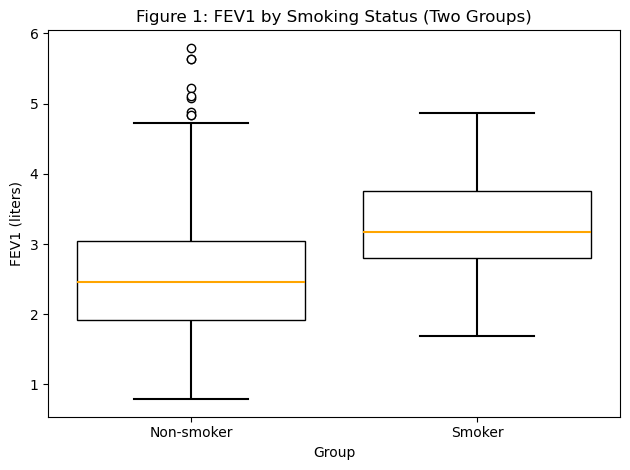

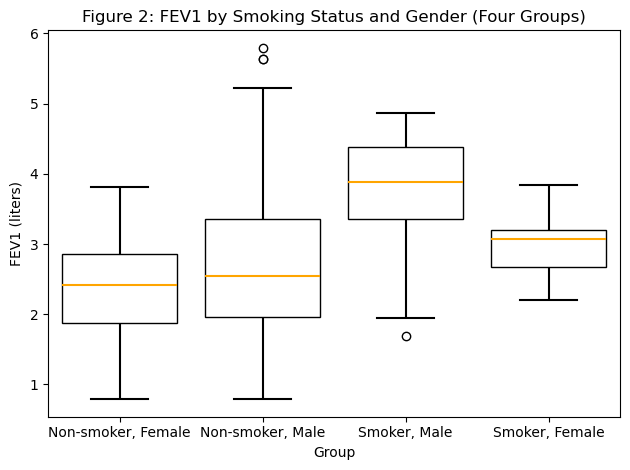

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#
#  Create a label for the main two groups: Smoker vs. Non-smoker
#
df["SmokingStatus"] = df["smoker"].map({0: "Non-smoker", 1: "Smoker"})

#
#  FIGURE A: Boxplot for the main two groups
#
# plt.figure(figsize=(6, 4))
# sns.boxplot(x="SmokingStatus", y="FEV1", data=df, hue="SmokingStatus", palette=sns.color_palette("coolwarm", 2), legend=False)
# plt.title("Figure A: FEV1 by Smoking Status (Two Groups)")
# plt.xlabel("Smoking Status")
# plt.ylabel("FEV1 (liters)")
# plt.tight_layout()
# plt.show()

ax = sns.boxplot(x="SmokingStatus", y="FEV1", data=df,
                 boxprops=dict(facecolor="none", edgecolor="black"),
                 medianprops=dict(color="orange", linewidth=1.5),
                 whiskerprops=dict(color="black", linewidth=1.5),
                 capprops=dict(color="black", linewidth=1.5),
                 flierprops=dict(marker="o", markerfacecolor="white", markeredgecolor="black", markersize=6))
plt.title("Figure 1: FEV1 by Smoking Status (Two Groups)")
plt.xlabel("Group")
plt.ylabel("FEV1 (liters)")
plt.tight_layout()
plt.show()

#
#  Create a combined label for the four subgroups:
#    (Non-smoker, Female), (Non-smoker, Male), (Smoker, Female), (Smoker, Male)
#
def label_subgroup(row):
    gender_str = "Female" if row["gender"] == 0 else "Male"
    smoke_str = "Smoker" if row["smoker"] == 1 else "Non-smoker"
    return f"{smoke_str}, {gender_str}"

df["Subgroup"] = df.apply(label_subgroup, axis=1)

#
#  FIGURE B: Boxplot for the four subgroups
#
# plt.figure(figsize=(8, 5))
# sns.boxplot(x="Subgroup", y="FEV1", data=df, hue="Subgroup", palette=sns.color_palette("coolwarm", 4))
# plt.title("Figure B: FEV1 by Smoking Status and Gender (Four Groups)")
# plt.xlabel("Group")
# plt.ylabel("FEV1 (liters)")
# plt.tight_layout()
# plt.show()


# plt.figure(figsize=(8, 5))
ax = sns.boxplot(x="Subgroup", y="FEV1", data=df,
                 boxprops=dict(facecolor="none", edgecolor="black"),
                 medianprops=dict(color="orange", linewidth=1.5),
                 whiskerprops=dict(color="black", linewidth=1.5),
                 capprops=dict(color="black", linewidth=1.5),
                 flierprops=dict(marker="o", markerfacecolor="white", markeredgecolor="black", markersize=6))
plt.title("Figure 2: FEV1 by Smoking Status and Gender (Four Groups)")
plt.xlabel("Group")
plt.ylabel("FEV1 (liters)")
plt.tight_layout()
plt.show()



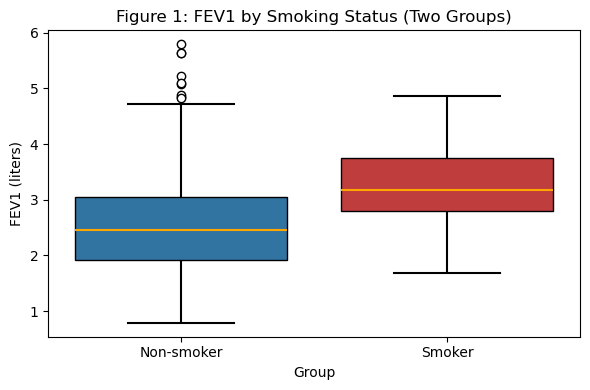

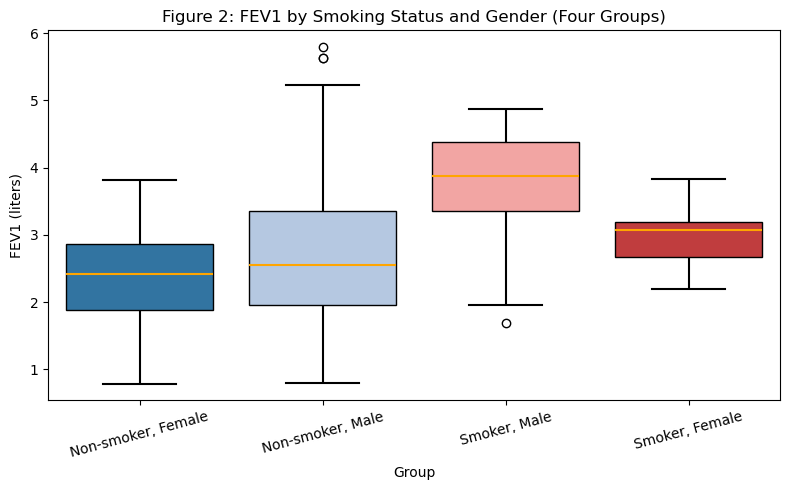

In [8]:
import pandas as pd

# Assuming df is already defined with 'smoker', 'FEV1', and 'gender' columns

# Create a label for the main two groups: Smoker vs. Non-smoker
df["SmokingStatus"] = df["smoker"].map({0: "Non-smoker", 1: "Smoker"})

# Define a custom color palette
group_palette = {"Non-smoker": "#1f77b4", "Smoker": "#d62728"}  # Blue for Non-smokers, Red for Smokers

# FIGURE 1: Boxplot for the main two groups
plt.figure(figsize=(6, 4))
sns.boxplot(x="SmokingStatus", y="FEV1", data=df, hue="SmokingStatus", palette=group_palette, legend=False,
            boxprops=dict(edgecolor="black"),
            medianprops=dict(color="orange", linewidth=1.5),
            whiskerprops=dict(color="black", linewidth=1.5),
            capprops=dict(color="black", linewidth=1.5),
            flierprops=dict(marker="o", markerfacecolor="white", markeredgecolor="black", markersize=6))
plt.title("Figure 1: FEV1 by Smoking Status (Two Groups)")
plt.xlabel("Group")
plt.ylabel("FEV1 (liters)")
plt.tight_layout()
plt.show()

# Create a combined label for the four subgroups
def label_subgroup(row):
    gender_str = "Female" if row["gender"] == 0 else "Male"
    smoke_str = "Smoker" if row["smoker"] == 1 else "Non-smoker"
    return f"{smoke_str}, {gender_str}"

df["Subgroup"] = df.apply(label_subgroup, axis=1)

# Define a custom color palette for four subgroups
subgroup_palette = {
    "Non-smoker, Female": "#1f77b4",  # Blue
    "Non-smoker, Male": "#aec7e8",  # Light Blue
    "Smoker, Female": "#d62728",  # Red
    "Smoker, Male": "#ff9896"  # Light Red
}

# FIGURE 2: Boxplot for the four subgroups
plt.figure(figsize=(8, 5))
sns.boxplot(x="Subgroup", y="FEV1", data=df, hue="Subgroup", palette=subgroup_palette, legend=False,
            boxprops=dict(edgecolor="black"),
            medianprops=dict(color="orange", linewidth=1.5),
            whiskerprops=dict(color="black", linewidth=1.5),
            capprops=dict(color="black", linewidth=1.5),
            flierprops=dict(marker="o", markerfacecolor="white", markeredgecolor="black", markersize=6))
plt.title("Figure 2: FEV1 by Smoking Status and Gender (Four Groups)")
plt.xlabel("Group")
plt.ylabel("FEV1 (liters)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


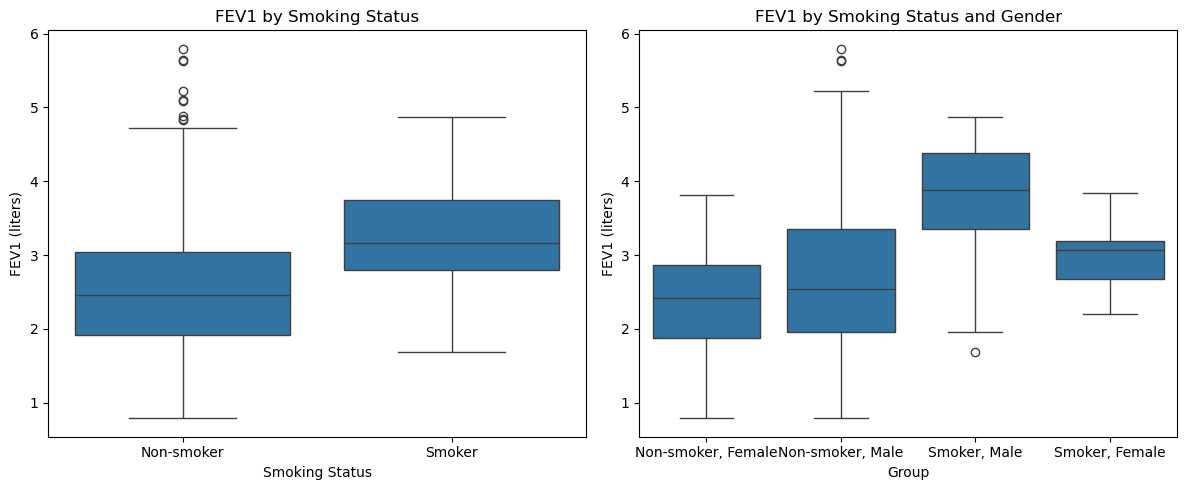

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(ax=axes[0], x="SmokingStatus", y="FEV1", data=df)
axes[0].set_title("FEV1 by Smoking Status")
axes[0].set_xlabel("Smoking Status")
axes[0].set_ylabel("FEV1 (liters)")

sns.boxplot(ax=axes[1], x="Subgroup", y="FEV1", data=df)
axes[1].set_title("FEV1 by Smoking Status and Gender")
axes[1].set_xlabel("Group")
axes[1].set_ylabel("FEV1 (liters)")

plt.tight_layout()
plt.show()


**Exercise 3 a)**

Correlation between FEV1 and age:    0.756
Correlation between FEV1 and weight: -0.039


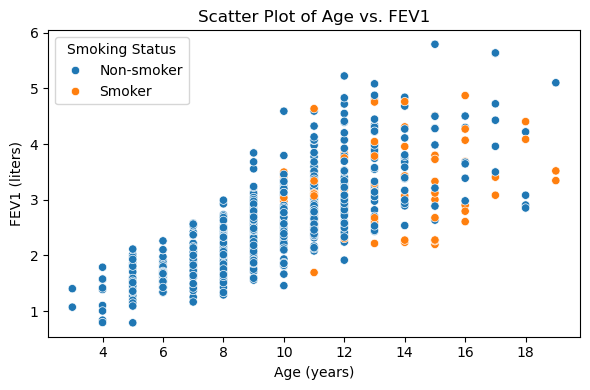

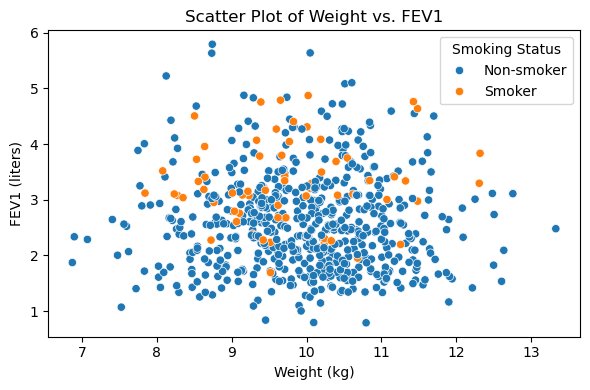

In [10]:
#  Calculate correlations
corr_age_fev1 = df["age"].corr(df["FEV1"])
corr_weight_fev1 = df["weight"].corr(df["FEV1"])

print(f"Correlation between FEV1 and age:    {corr_age_fev1:.3f}")
print(f"Correlation between FEV1 and weight: {corr_weight_fev1:.3f}")

#  Create a label for smoker vs. non-smoker, for coloring
df["SmokingStatus"] = df["smoker"].map({0: "Non-smoker", 1: "Smoker"})

#  Scatter plot: age vs. FEV1
plt.figure(figsize=(6, 4))
sns.scatterplot(x="age", y="FEV1", hue="SmokingStatus", data=df)
plt.title("Scatter Plot of Age vs. FEV1")
plt.xlabel("Age (years)")
plt.ylabel("FEV1 (liters)")
plt.legend(title="Smoking Status")
plt.tight_layout()
plt.show()

#  Scatter plot: weight vs. FEV1
plt.figure(figsize=(6, 4))
sns.scatterplot(x="weight", y="FEV1", hue="SmokingStatus", data=df)
plt.title("Scatter Plot of Weight vs. FEV1")
plt.xlabel("Weight (kg)")
plt.ylabel("FEV1 (liters)")
plt.legend(title="Smoking Status")
plt.tight_layout()
plt.show()


**Exercise 4 a)**

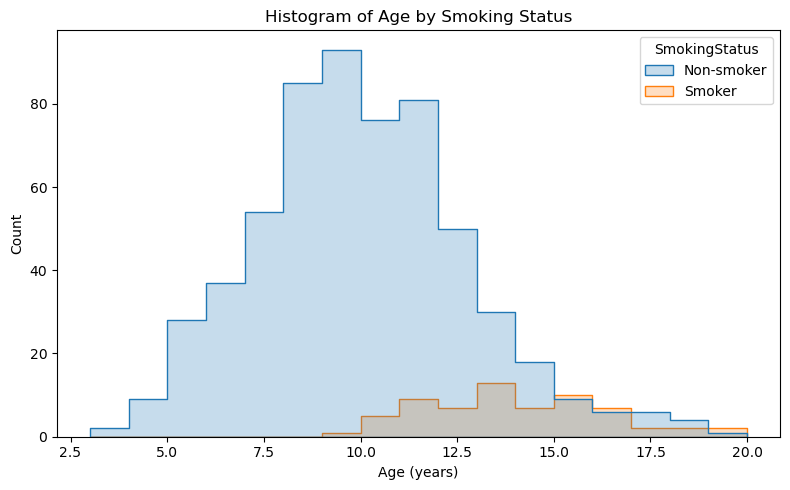

In [11]:
#  Create a combined histogram of age, distinguishing by smoking status
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="age", hue="SmokingStatus", bins=range(3, 21), element="step", kde=False, stat="count")

plt.title("Histogram of Age by Smoking Status")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


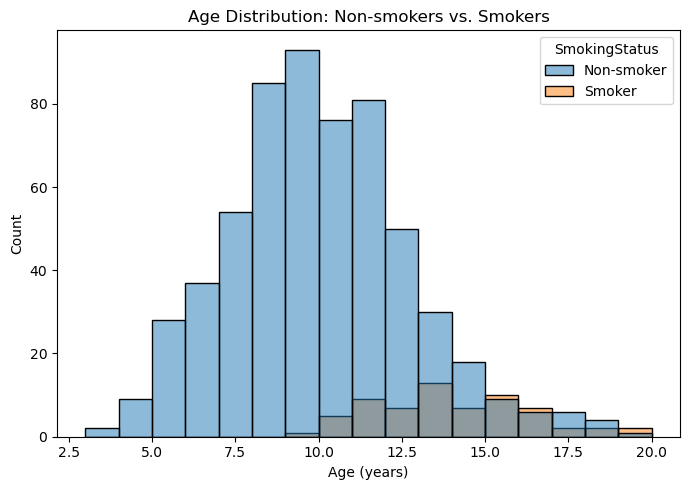

In [12]:
#  Single plot with overlapping histograms using 'multiple="layer"'
plt.figure(figsize=(7,5))
sns.histplot(
    data=df,
    x="age",
    hue="SmokingStatus",
    bins=range(3, 21),
    multiple="layer",             # default is "layer", which overlaps
    # palette=["blue", "orange"],
    alpha=0.5                     # transparency for seeing overlap
)

plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.title("Age Distribution: Non-smokers vs. Smokers")
plt.tight_layout()
plt.show()
